In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# DB connection
conn = sqlite3.connect(r"C:\Users\Nickel-Man\Desktop\SQL\diabeth.db")

In [3]:
# SQL-query
q_diabetes = """
SELECT
	Diabetes_012
	, COUNT(*)
	, ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM health_conditions)), 2) AS percentage
FROM health_conditions
GROUP BY Diabetes_012;
"""

df_diabetes = pd.read_sql_query(q_diabetes, conn)

print(df_diabetes)

   Diabetes_012  COUNT(*)  percentage
0           0.0    213703       84.24
1           1.0      4631        1.83
2           2.0     35346       13.93


<Axes: xlabel='Diabetes', ylabel='Count'>

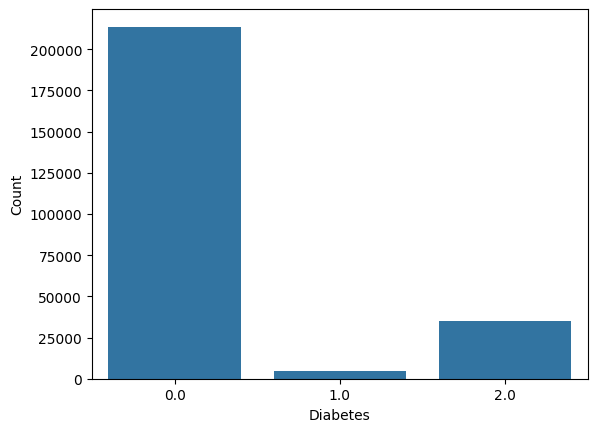

In [4]:
# Create a bar plot for counts
df_diabetes.rename(columns={"Diabetes_012":'Diabetes', "COUNT(*)": "Count", "percentage": "Percentage" }, inplace=True)
sns.barplot(x="Diabetes", y="Count", data=df_diabetes)

<Axes: xlabel='Percentage', ylabel='Count'>

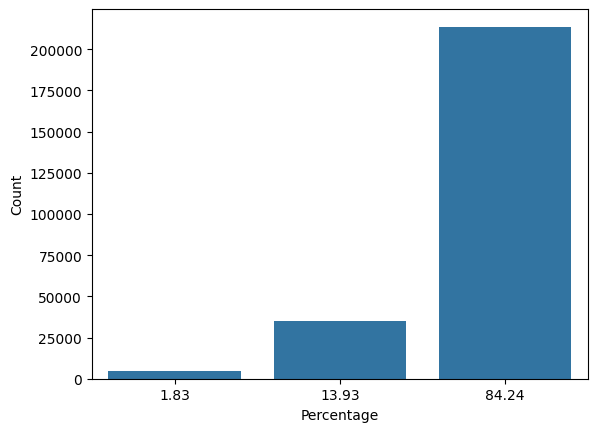

In [5]:
sns.barplot(x="Percentage", y='Count', data=df_diabetes)

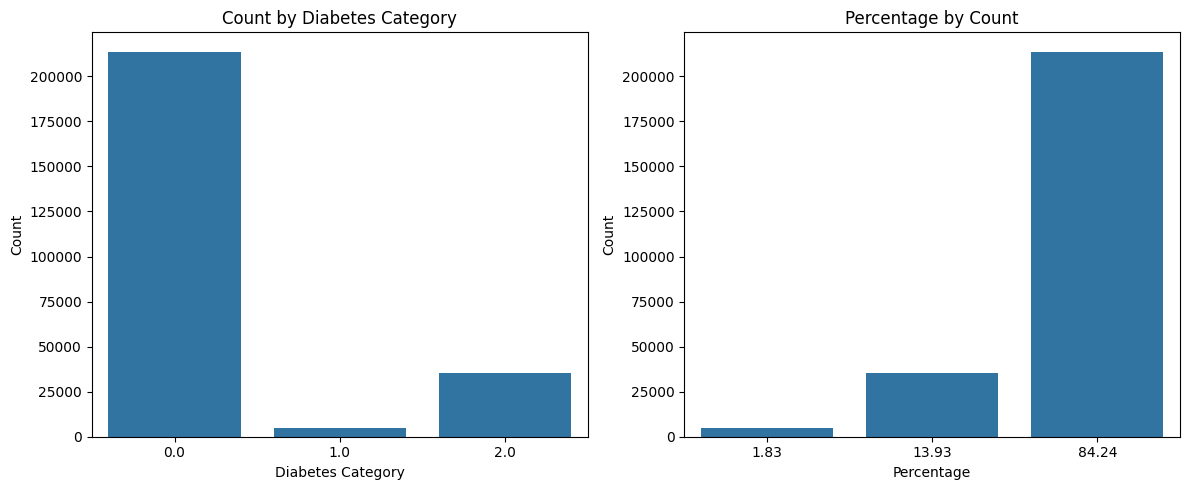

In [6]:
# Rename columns for clarity (if not already done)
df_diabetes.rename(columns={"Diabetes_012": 'Diabetes', "COUNT(*)": "Count", "percentage": "Percentage"}, inplace=True)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust `figsize` as needed

# Plot 1: Count by Diabetes Category
sns.barplot(x="Diabetes", y="Count", data=df_diabetes, ax=axes[0])
axes[0].set_title("Count by Diabetes Category")
axes[0].set_xlabel("Diabetes Category")
axes[0].set_ylabel("Count")

# Plot 2: Percentage by Count
sns.barplot(x="Percentage", y="Count", data=df_diabetes, ax=axes[1])
axes[1].set_title("Percentage by Count")
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# SQL-query
q_age = """
SELECT
	Age
	, COUNT(*) AS patient_count
FROM patients
GROUP BY Age
ORDER BY Age;
"""

# Завантаження результатів у DataFrame
df_age = pd.read_sql_query(q_age, conn)

# Виведення результатів
print(df_age)

    Age  patient_count
0     1           5700
1     2           7598
2     3          11123
3     4          13823
4     5          16157
5     6          19819
6     7          26314
7     8          30832
8     9          33244
9    10          32194
10   11          23533
11   12          15980
12   13          17363


In [8]:
df_age

,Age,patient_count
0,1,5700
1,2,7598
2,3,11123
3,4,13823
4,5,16157
5,6,19819
6,7,26314
7,8,30832
8,9,33244
9,10,32194


C:\Users\Nickel-Man\AppData\Local\Temp\ipykernel_14536\4232652712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='patient_count', data=df_age, palette='viridis')


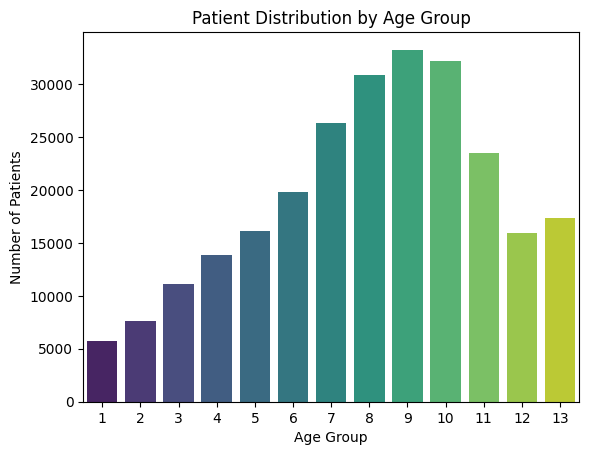

In [9]:
# Створення стовпчастої діаграми
sns.barplot(x='Age', y='patient_count', data=df_age, palette='viridis')

# Додавання підписів
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Patient Distribution by Age Group')
plt.show()

In [10]:
q_highBp='''
SELECT
	p.Age
	, hc.HighBP
	, hc.Diabetes_012
FROM patients p
JOIN health_conditions hc ON p.patient_id = hc.patient_id
WHERE hc.HighBP = 1 AND hc.Diabetes_012 = 2;
'''

df_highBp = pd.read_sql(q_highBp, conn)

print(df_highBp)

       Age  HighBP  Diabetes_012
0        9       1           2.0
1       11       1           2.0
2       13       1           2.0
3       10       1           2.0
4       12       1           2.0
...    ...     ...           ...
26599    9       1           2.0
26600    7       1           2.0
26601   13       1           2.0
26602   11       1           2.0
26603    9       1           2.0

[26604 rows x 3 columns]


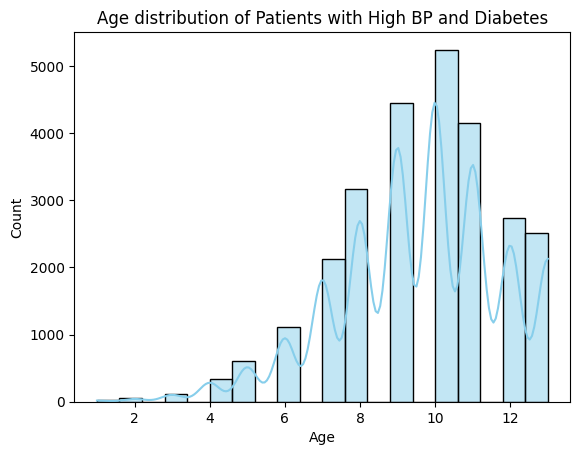

In [31]:
sns.histplot(df_highBp['Age'],bins=20,kde=True, color='skyblue', edgecolor='black')
plt.title('Age distribution of Patients with High BP and Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(r"D:\Python_Projects\highBp.jpg", dpi=200)
plt.show()

In [32]:
q_activity='''
SELECT
	l.PhysActivity
	, hc.Diabetes_012
	, COUNT(*) AS patient_count
FROM lifestyle l
JOIN health_conditions hc ON hc.patient_id = l.patient_id
GROUP BY l.PhysActivity, hc.Diabetes_012
ORDER BY patient_count
'''

df_activity = pd.read_sql(q_activity, conn)
print(df_activity)

   PhysActivity  Diabetes_012  patient_count
0             0           1.0           1489
1             1           1.0           3142
2             0           2.0          13059
3             1           2.0          22287
4             0           0.0          47212
5             1           0.0         166491


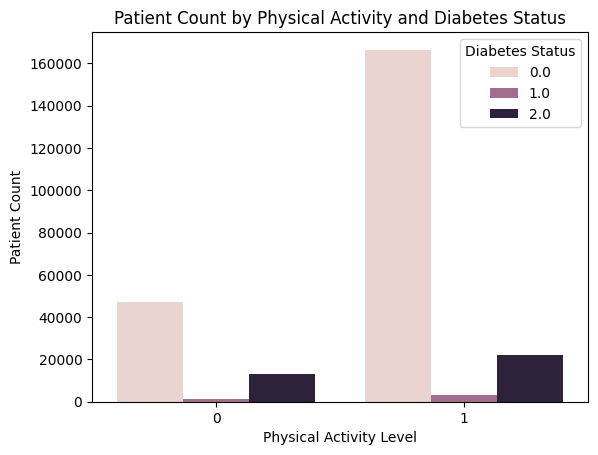

In [36]:
sns.barplot(x='PhysActivity', y='patient_count', hue='Diabetes_012',data=df_activity)

plt.title('Patient Count by Physical Activity and Diabetes Status')
plt.xlabel('Physical Activity Level')
plt.ylabel('Patient Count')
plt.legend(title='Diabetes Status')
plt.show()

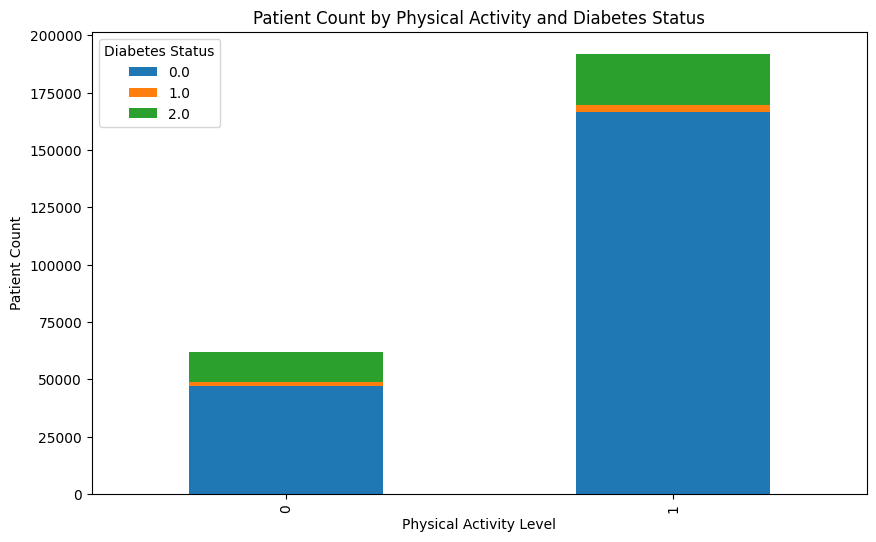

In [37]:
# Pivot data for stacked bar plot
pivot_data = df_activity.pivot(index="PhysActivity", columns="Diabetes_012", values="patient_count")

# Plot the stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title("Patient Count by Physical Activity and Diabetes Status")
plt.xlabel("Physical Activity Level")
plt.ylabel("Patient Count")
plt.legend(title="Diabetes Status")
plt.show()


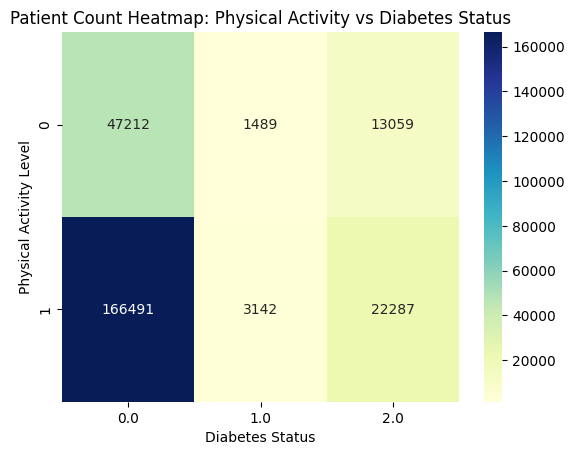

In [38]:
# Pivot data for the heatmap
heatmap_data = df_activity.pivot(index="PhysActivity", columns="Diabetes_012", values="patient_count")

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

# Add titles and labels
plt.title("Patient Count Heatmap: Physical Activity vs Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Physical Activity Level")
plt.show()